# Colin Inns
## Assignment 2 - Clustering

<Axes: >

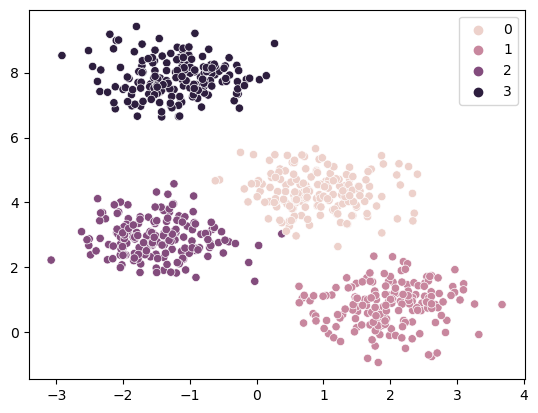

In [6]:
from KMeans import Kmeans # import my implementation of Kmeans
from sklearn.datasets import make_blobs
import seaborn as sns

myKmeans = Kmeans(folds=4) # insantiate a kmeans object w/ 4 centers

X, cluster_assignments = make_blobs(n_samples=700, centers=4,
cluster_std=0.60, random_state=0)

x = [i[0] for i in X] # all of the x coordinates
y = [i[1] for i in X] # all of the y coordinates

sns.scatterplot(x=x, y=y, hue=cluster_assignments) 
#scatter plot showing x, y coordinates and their cluster_assignments given by make_blobs -->

<Axes: >

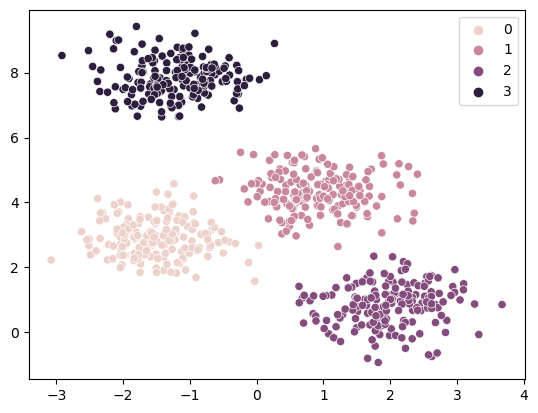

In [12]:
sns.scatterplot(x=x, y=y, hue=myKmeans.fit(X)[0])
#scatter plot showing x, y coordinates and their cluster as assigned by my implementation of kMeans

/Users/colininns/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

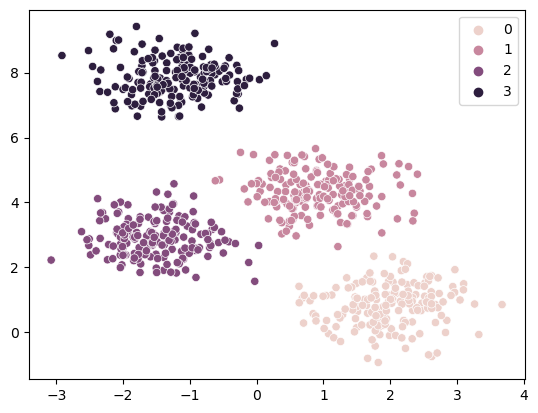

In [7]:
from sklearn.cluster import KMeans
skMeans = KMeans(n_clusters=4).fit(X)
skLabels = skMeans.labels_
sns.scatterplot(x=x, y=y, hue=skLabels) # plot the kmeans from scikit

### Comparison
Both my implementation and the implementation of KMeans from scikit-learn are the same but for some reason this is different from the values given from cluster_assignment. There is only one point different, around 0.4, 3. By my eye test it seems to me like the clusters by my implementation and the scikit-learn implementation of KMeans make more sense than the values given from cluster_assignment.

## Clustering Algorithms

### Chicago Taxi Dataset

In [1]:
import pandas as pd
df = pd.read_csv('Taxi_Trips__2013-2023_.csv')
#extract only the pickup and dropoff locations for clustering
taxi_df = pd.concat([df['Pickup Centroid Latitude'], df['Pickup Centroid Longitude']], axis=1, keys=['pickup_lat', 'pickup_long'])
taxi_df = taxi_df.dropna() # get rid of unknown values
taxi_df

,pickup_lat,pickup_long
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
101782,41.878866,-87.625192
101783,41.885281,-87.657233
101784,41.899602,-87.633308
101785,41.899602,-87.633308


In [35]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95657 entries, 0 to 101786
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pickup_lat   95657 non-null  float64
 1   pickup_long  95657 non-null  float64
dtypes: float64(2)
memory usage: 2.2 MB


In [26]:
taxi_df.describe()

,pickup_lat,pickup_long,dropoff_lat,dropoff_lon
count,95657.000000,95657.000000,92489.000000,92489.000000
mean,41.898703,-87.689956,41.892116,-87.657546
std,0.064621,0.104274,0.059306,0.063430
min,41.660136,-87.913625,41.660136,-87.913625
25%,41.878866,-87.695013,41.878866,-87.663518
50%,41.895033,-87.642649,41.892508,-87.633308
75%,41.949829,-87.626211,41.922686,-87.625192
max,42.015934,-87.534903,42.021224,-87.534903


In [9]:
pickups = taxi_df[['pickup_lat', 'pickup_long']].values
pickups

array([[ 41.98026431, -87.9136246 ],
       [ 41.87886558, -87.62519214],
       [ 41.89960211, -87.63330804],
       ...,
       [ 41.89960211, -87.63330804],
       [ 41.89960211, -87.63330804],
       [ 41.98026431, -87.9136246 ]])

/Users/colininns/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

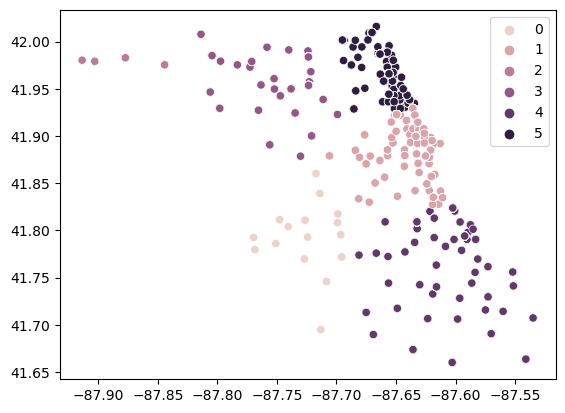

In [12]:
x = [i[1] for i in pickups]
y = [i[0] for i in pickups]
cMean = KMeans(n_clusters=6).fit(pickups)
clabel = cMean.labels_
sns.scatterplot(x=x, y=y, hue=clabel) # scatter plot of the Chicago Taxi data using kmeans

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(pickups, KMeans(n_clusters=6).fit_predict(pickups))

/Users/colininns/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7019085532046231

1. I chose the kmeans clustering algorithm because I think that the clusters should be roughly spherical and should have aproximately similar size.
2. I did some preprocessing by only keeping the pickup data for the clustering. Additionally, I removed all the null values that were still present in order to be able to cluster and graph.
3. See the output above
4. I used the silhuette score metric in order to determine the performance of the clustring model. It is essentially mean intra-cluster distance and the mean nearest-cluster distance. I got a score of around 0.7 which I think is a pretty good score since 1 is the best. I think this was generally what I expected since I thought that kmeans would be a good representation.

### Finland Dataset

In [24]:
df = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', sep='\t')
#it seems that the lat lon is missing the decimal point
df

,625983,297439
0,626146,297440
1,626144,297456
2,626004,297394
3,626018,297437
4,626038,297518
...,...,...
13461,626042,297444
13462,625977,297443
13463,626050,297404
13464,625995,297426


In [34]:
from sklearn.cluster import DBSCAN
data = df[:].values
x = [i[1] for i in data]
y = [i[0] for i in data]
clustering = DBSCAN(eps=3, min_samples=2).fit(data)
fin_labels = clustering.labels_

<Axes: >

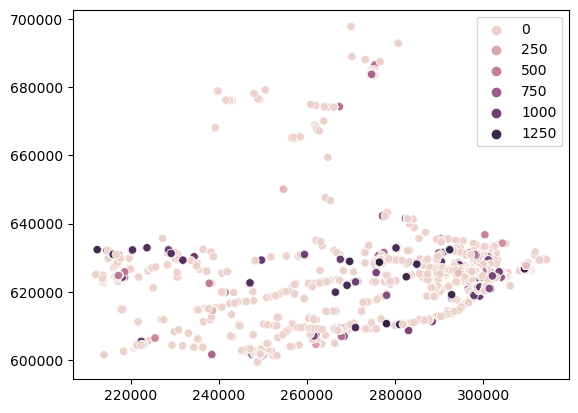

In [35]:
sns.scatterplot(x=x, y=y, hue=fin_labels)

In [36]:
silhouette_score(data, DBSCAN(eps=3, min_samples=2).fit_predict(data))

-0.15632137928802628

1. I chose the DBSCAN clustering model because it is good at finding clusters of any shape and I could tell this was a large geolocation set. I thought it would be good at finding the arbitrary shapes.
2. I did not do much preprocessing however I did need to import the csv file with a tab seperator
3. See output above
4. I used the silhouette score as the metric. Suprisingly I got very poor performance from this algorithm. This was not what I expected at all. I thought DBSCAN would be a good algorithm for geolocation data but clearly in this instance I was wrong.